<a href="https://colab.research.google.com/github/nanauman/CIDM5310-Panda-Assignments/blob/main/Activity12_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# libraries
#
import pandas as pd
import numpy as np
#

In [5]:
data_fn = '/Data Sets/household_power_consumption.csv'
home_elec = \
    pd.read_csv('' + data_fn,
                sep = ';',
                low_memory = False)

In [6]:
home_elec.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/8/2008,00:00:00,0.500,0.226,239.750,2.400,0.000,0.000,1.0
1,1/8/2008,00:01:00,0.482,0.224,240.340,2.200,0.000,0.000,1.0
2,1/8/2008,00:02:00,0.502,0.234,241.680,2.400,0.000,0.000,0.0
3,1/8/2008,00:03:00,0.556,0.228,241.750,2.600,0.000,0.000,1.0
4,1/8/2008,00:04:00,0.854,0.342,241.550,4.000,0.000,1.000,7.0


In [9]:
home_elec.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [10]:
for col in home_elec.columns:
    print('information for column ' +
          col +
          ':\n',
          home_elec[col].describe())

information for column Date:
 count       340567
unique         237
top       1/8/2008
freq          1440
Name: Date, dtype: object
information for column Time:
 count       340567
unique        1440
top       00:00:00
freq           237
Name: Time, dtype: object
information for column Global_active_power:
 count     340567
unique      3578
top        0.080
freq        5230
Name: Global_active_power, dtype: object
information for column Global_reactive_power:
 count     340566
unique       402
top        0.000
freq       81815
Name: Global_reactive_power, dtype: object
information for column Voltage:
 count      340566
unique       2293
top       241.180
freq          872
Name: Voltage, dtype: object
information for column Global_intensity:
 count     340566
unique       203
top        1.200
freq       26652
Name: Global_intensity, dtype: object
information for column Sub_metering_1:
 count     340566
unique        80
top        0.000
freq      313283
Name: Sub_metering_1, dtype: objec

In [11]:
home_elec.replace('?', np.nan, inplace = True)
home_elec.interpolate(inplace = True)

In [12]:
for col in home_elec.columns[2:]:
    home_elec[col] = home_elec[col].astype(float)

<Axes: xlabel='Date'>

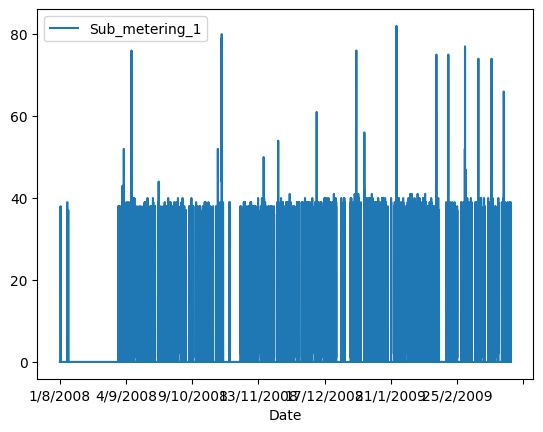

In [13]:
(home_elec[['Date',
            'Sub_metering_1']].
             plot(x = 'Date',
                  y = 'Sub_metering_1'))

In [21]:
#
# Sub_metering_1 is the kitchen and related
# create a new DataFrame with the dates, times and these data
#
kitchen_elec = home_elec[['Date',
                          'Time',
                          'Sub_metering_1']]
kitchen_elec = kitchen_elec.loc[kitchen_elec['Date'].
                      str.contains('2009'), :]
kitchen_elec.columns = ['Date',
                        'Time',
                        'Kitchen_power_use']
kitchen_elec.head()

,Date,Time,Kitchen_power_use
220320,1/1/2009,00:00:00,0.0
220321,1/1/2009,00:01:00,0.0
220322,1/1/2009,00:02:00,0.0
220323,1/1/2009,00:03:00,0.0
220324,1/1/2009,00:04:00,0.0


In [22]:
kitchen_elec.loc[:, 'timestamp'] = \
    pd.to_datetime(kitchen_elec.loc[:, 'Date'] + ' '
                   + kitchen_elec.loc[:, 'Time'],
                  dayfirst = True)
kitchen_elec.sort_values('timestamp',
                         inplace = True)
kitchen_elec.head()

,Date,Time,Kitchen_power_use,timestamp
220320,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00
220321,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00
220322,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00
220323,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00
220324,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00


In [23]:
#
# create an hours column
#
kitchen_elec['hour'] = \
    kitchen_elec['timestamp'].dt.hour
#
# create a date column in the standard format
#
kitchen_elec['date'] = \
    kitchen_elec['timestamp'].dt.date
kitchen_elec.head()

,Date,Time,Kitchen_power_use,timestamp,hour,date
220320,1/1/2009,00:00:00,0.0,2009-01-01 00:00:00,0,2009-01-01
220321,1/1/2009,00:01:00,0.0,2009-01-01 00:01:00,0,2009-01-01
220322,1/1/2009,00:02:00,0.0,2009-01-01 00:02:00,0,2009-01-01
220323,1/1/2009,00:03:00,0.0,2009-01-01 00:03:00,0,2009-01-01
220324,1/1/2009,00:04:00,0.0,2009-01-01 00:04:00,0,2009-01-01


In [24]:
kitchen_elec = \
    (kitchen_elec[['date',
                  'hour',
                  'Kitchen_power_use']].
                  groupby(['date',
                           'hour']).sum())
kitchen_elec.reset_index(inplace = True)
kitchen_elec.iloc[20:28, :]

,date,hour,Kitchen_power_use
20,2009-01-01,20,0.0
21,2009-01-01,21,0.0
22,2009-01-01,22,0.0
23,2009-01-01,23,0.0
24,2009-01-02,0,0.0
25,2009-01-02,1,0.0
26,2009-01-02,2,0.0
27,2009-01-02,3,0.0


<ipython-input-25-a4ae38ce3804>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (kitchen_elec.loc[((kitchen_elec['date'] >=
<ipython-input-25-a4ae38ce3804>:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (kitchen_elec['date'] <


<Axes: xlabel='hour'>

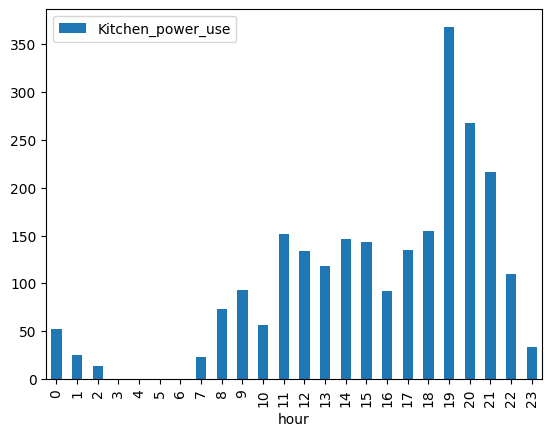

In [25]:
#
# aggregate values by hour for January
#
(kitchen_elec.loc[((kitchen_elec['date'] >=
                    pd.to_datetime('2009-01-01')) &
                   (kitchen_elec['date'] <
                    pd.to_datetime('2009-02-01'))),
                  ['hour',
                   'Kitchen_power_use']].
                   groupby('hour').mean().plot(kind =
                                               'bar'))

<Axes: xlabel='hour'>

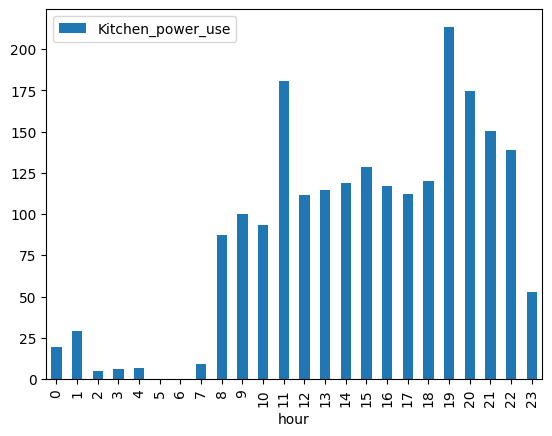

In [26]:
#
# aggregate values by hour for the entire year
#
(kitchen_elec.loc[:,
                  ['hour',
                   'Kitchen_power_use']].
                    groupby('hour').mean().plot(kind =
                                                'bar'))